In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
titanic = sns.load_dataset('titanic')

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.isnull().sum()/titanic.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [12]:
titanic['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

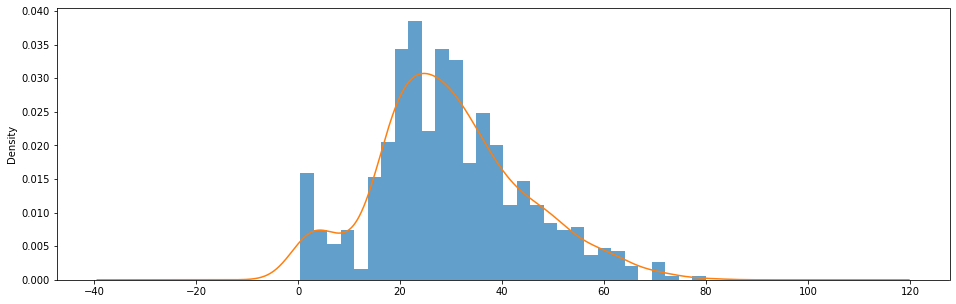

In [13]:
ax = titanic['age'].hist(bins = 30, density=True, stacked = True, alpha = .7, figsize = (16,5))
titanic['age'].plot(kind='density')

Text(0.5, 1.0, 'Male')

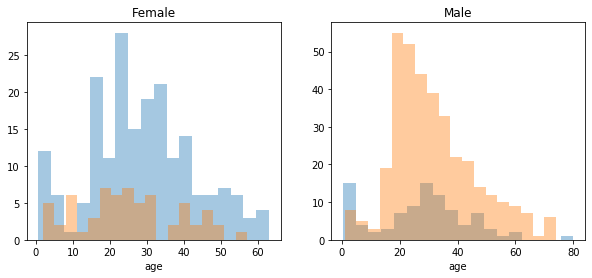

In [14]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (10,4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived] == 1].age.dropna(),bins = 18,ax = axes[0],kde = False)
ax = sns.distplot(women[women[survived] == 0].age.dropna(),bins = 18,ax = axes[0],kde = False)
ax.set_title('Female')

ax = sns.distplot(men[men[survived] == 1].age.dropna(),bins = 18,ax = axes[1],kde = False)
ax = sns.distplot(men[men[survived] == 0].age.dropna(),bins = 18,ax = axes[1],kde = False)
ax.set_title('Male')

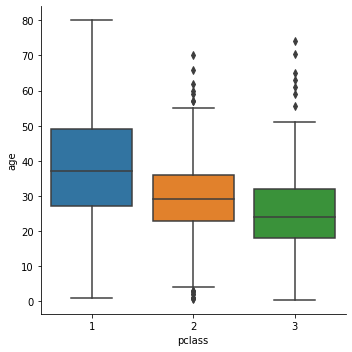

In [15]:
sns.catplot(x = 'pclass',y = 'age', data = titanic, kind = 'box')

In [16]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [17]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [18]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [19]:
############## Fill Age #################
def input_age(cols) :
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        return titanic[titanic['pclass'] == pclass]['age'].mean()
    else :
        return age

In [20]:
titanic['age'] = titanic[['age','pclass']].apply(input_age, axis = 1)

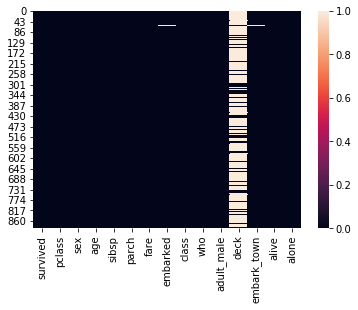

In [21]:
sns.heatmap(titanic.isnull())

In [22]:
###############  Fill embarked  ###############

titanic['embark_town'].isnull().sum()

2

In [23]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [24]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

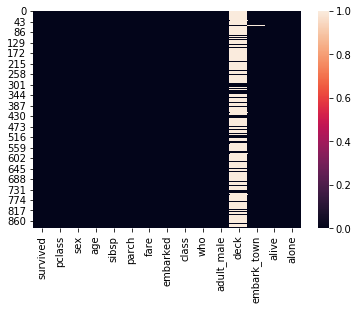

In [25]:
sns.heatmap(titanic.isnull())

In [26]:
titanic.drop(labels = ['embark_town','deck','alive'], inplace = True, axis = 1)

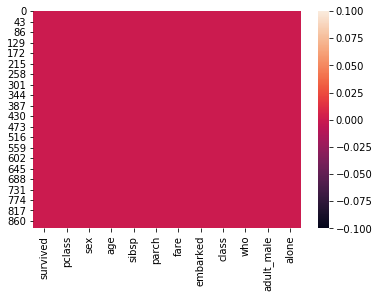

In [27]:
sns.heatmap(titanic.isnull())

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [29]:
genders = {'male': 0 ,'female' : 1}
titanic['sex'] = titanic['sex'].map(genders)

In [30]:
adult_male = {True : 1, False: 0}
titanic['adult_male'] = titanic['adult_male'] .map(adult_male) 

In [31]:
alone = {True : 1, False: 0}
titanic['alone'] = titanic['alone'] .map(alone)

In [32]:
ports = {'S' : 0, 'C' : 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'] .map(ports)

In [33]:
titanic.drop(labels = ['class','who'],axis = 1,inplace = True )

In [34]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22.00000,1,0,7.2500,0,1,0
1,1,1,1,38.00000,1,0,71.2833,1,0,0
2,1,3,1,26.00000,0,0,7.9250,0,0,1
3,1,1,1,35.00000,1,0,53.1000,0,0,0
4,0,3,0,35.00000,0,0,8.0500,0,1,1
5,0,3,0,25.14062,0,0,8.4583,2,1,1
6,0,1,0,54.00000,0,0,51.8625,0,1,1
7,0,3,0,2.00000,3,1,21.0750,0,0,0
8,1,3,1,27.00000,0,2,11.1333,0,0,0
9,1,2,1,14.00000,1,0,30.0708,1,0,0


In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   adult_male  891 non-null    int64  
 9   alone       891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [36]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int64
 1   pclass      891 non-null    int32
 2   sex         891 non-null    int64
 3   age         891 non-null    int32
 4   sibsp       891 non-null    int64
 5   parch       891 non-null    int64
 6   fare        891 non-null    int32
 7   embarked    891 non-null    int64
 8   adult_male  891 non-null    int64
 9   alone       891 non-null    int64
dtypes: int32(3), int64(7)
memory usage: 59.3 KB


In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [39]:
#####  Logistic Regression  #######
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [63]:
x = titanic.drop('survived',axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 8,stratify = y)

In [64]:
X_train.shape

(712, 9)

In [65]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_predict = model.predict(X_test)

In [67]:
model.score(X_test,y_test)

0.8379888268156425

In [47]:
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs',max_iter=200)
rfe = RFE(model,5,verbose = 1)
rfe = rfe.fit(x,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
x.shape

(891, 9)

In [49]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [50]:
xx = x[x.columns[rfe.support_]]
xx.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(xx,y,test_size = .2, random_state = 8,stratify = y)
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8547486033519553